In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')


In [5]:
from sklearn import set_config
set_config(transform_output="pandas")

In [6]:
#Loading the dataset
diabetes_data = pd.read_csv('./data/diabetes.csv')

#Print the first 5 rows of the dataframe.
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Basic EDA and statistical analysis


In [7]:
## gives information about the data types,columns, null value counts, memory usage etc
## function reference : https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
diabetes_data.describe()
## Also see :
##to return columns of a specific dtype: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.select_dtypes.html#pandas.DataFrame.select_dtypes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [12]:
diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


#### To fill these Nan values the data distribution needs to be understood

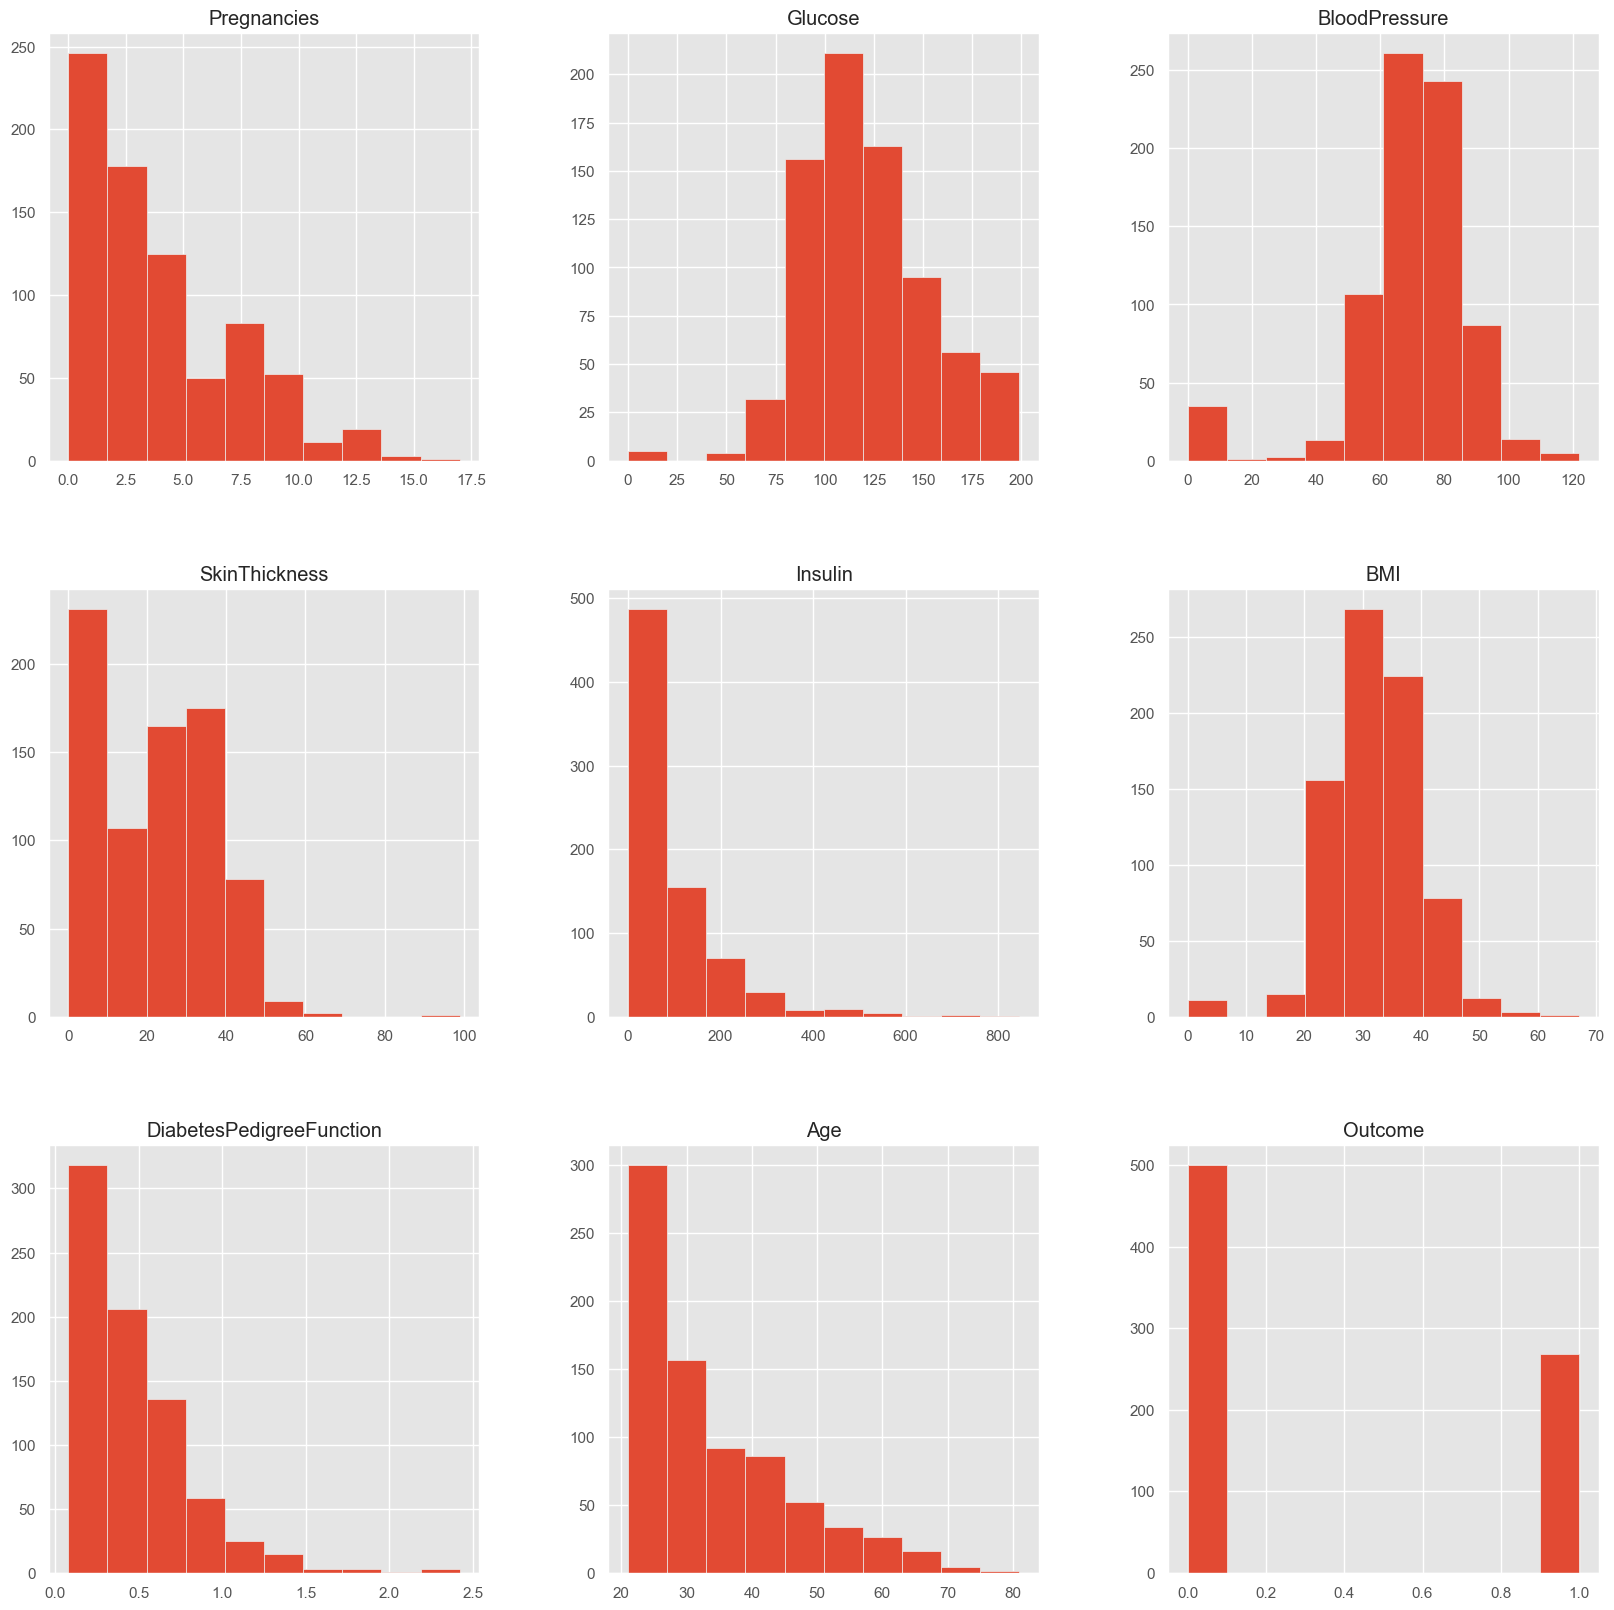

In [13]:
p = diabetes_data.hist(figsize = (20,20))

### Aiming to impute nan values for the columns in accordance with their distribution

<Axes: >

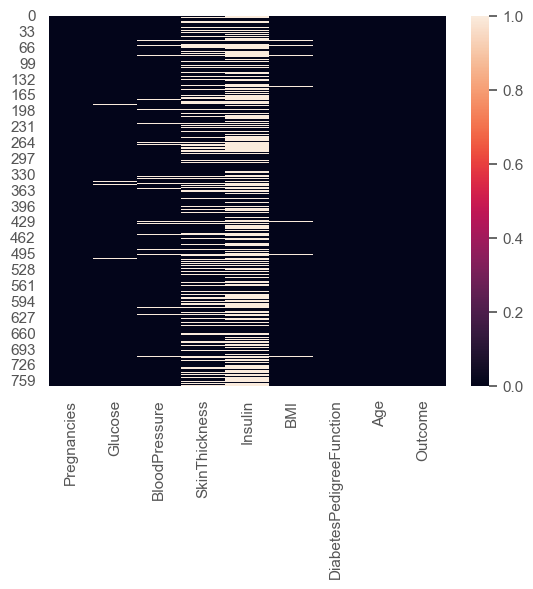

In [23]:
sns.heatmap(diabetes_data_copy.isna().astype(np.int8), cmap='rocket')

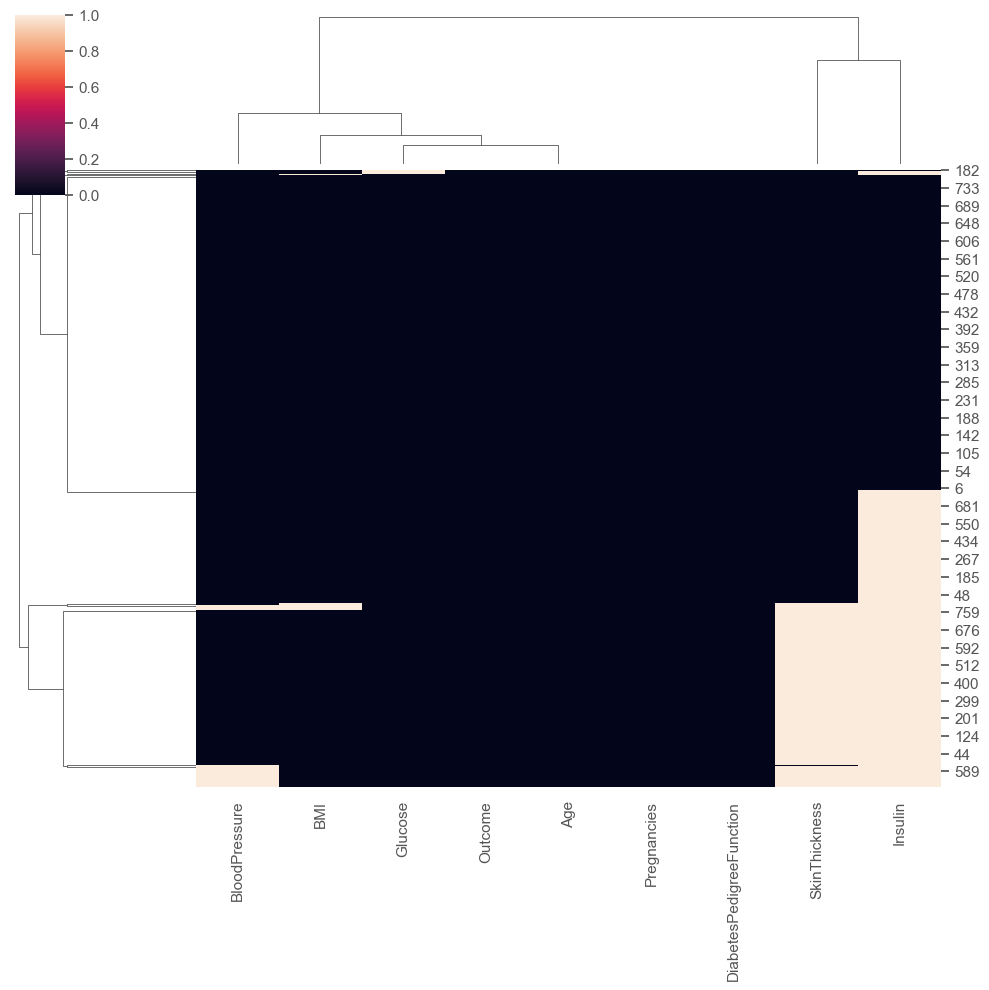

In [24]:
sns.clustermap(diabetes_data_copy.isna().astype(np.int8), cmap='rocket')

In [25]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

## Plotting after Nan removal 

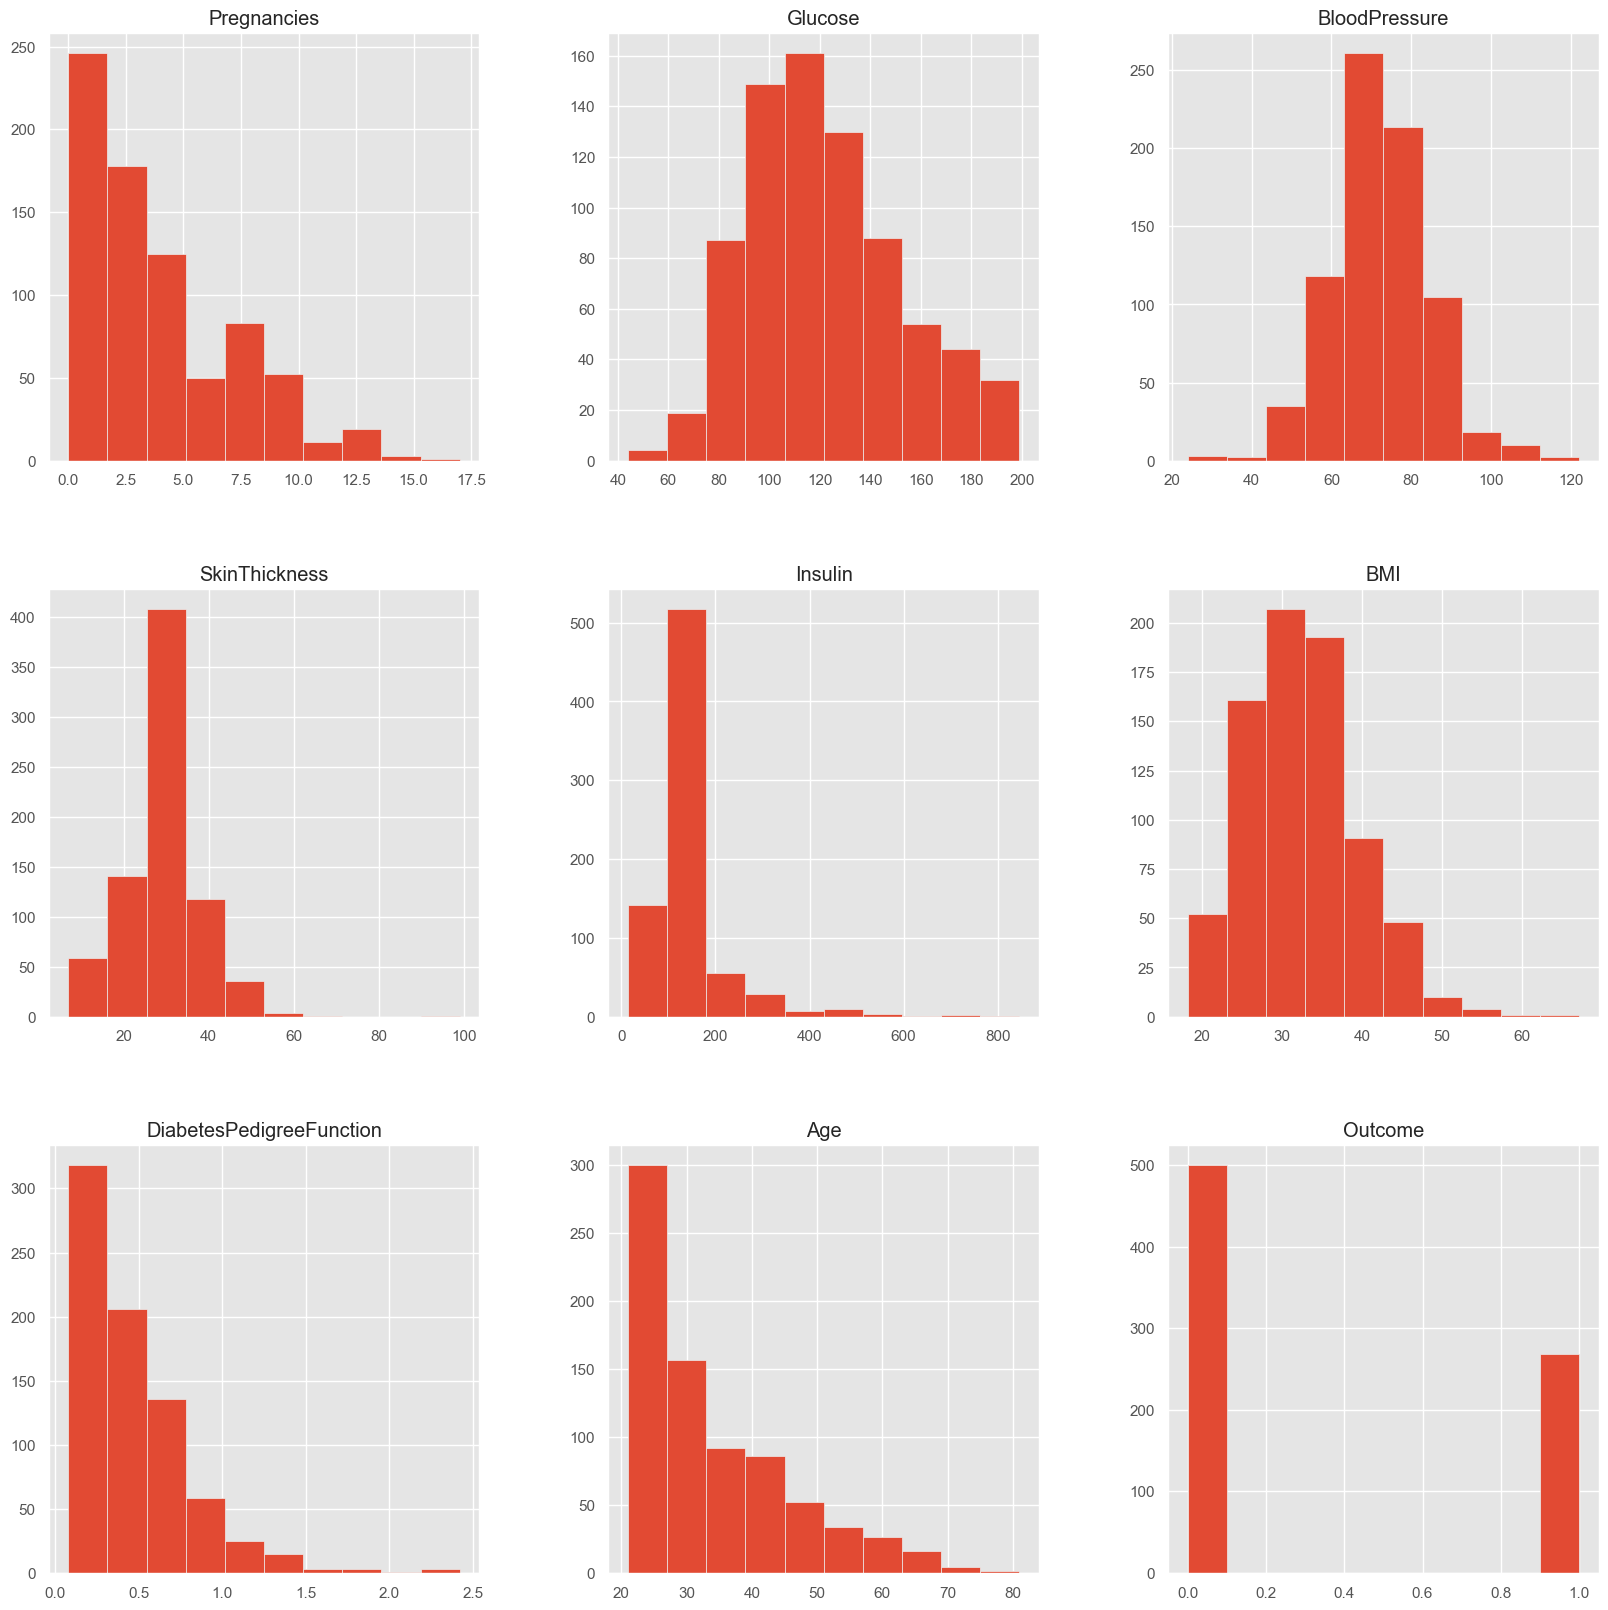

In [26]:
p = diabetes_data_copy.hist(figsize = (20,20))

Outcome
0    500
1    268
Name: count, dtype: int64


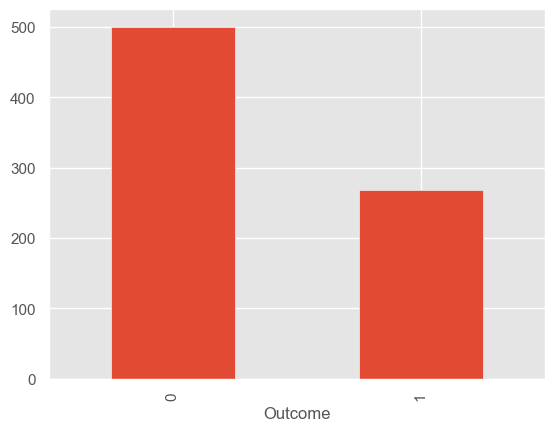

In [27]:
## checking the balance of the data by plotting the count of outcomes by their value
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = diabetes_data["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_data.Outcome.value_counts())
p=diabetes_data.Outcome.value_counts().plot(kind="bar")


#### Pair plot for clean data

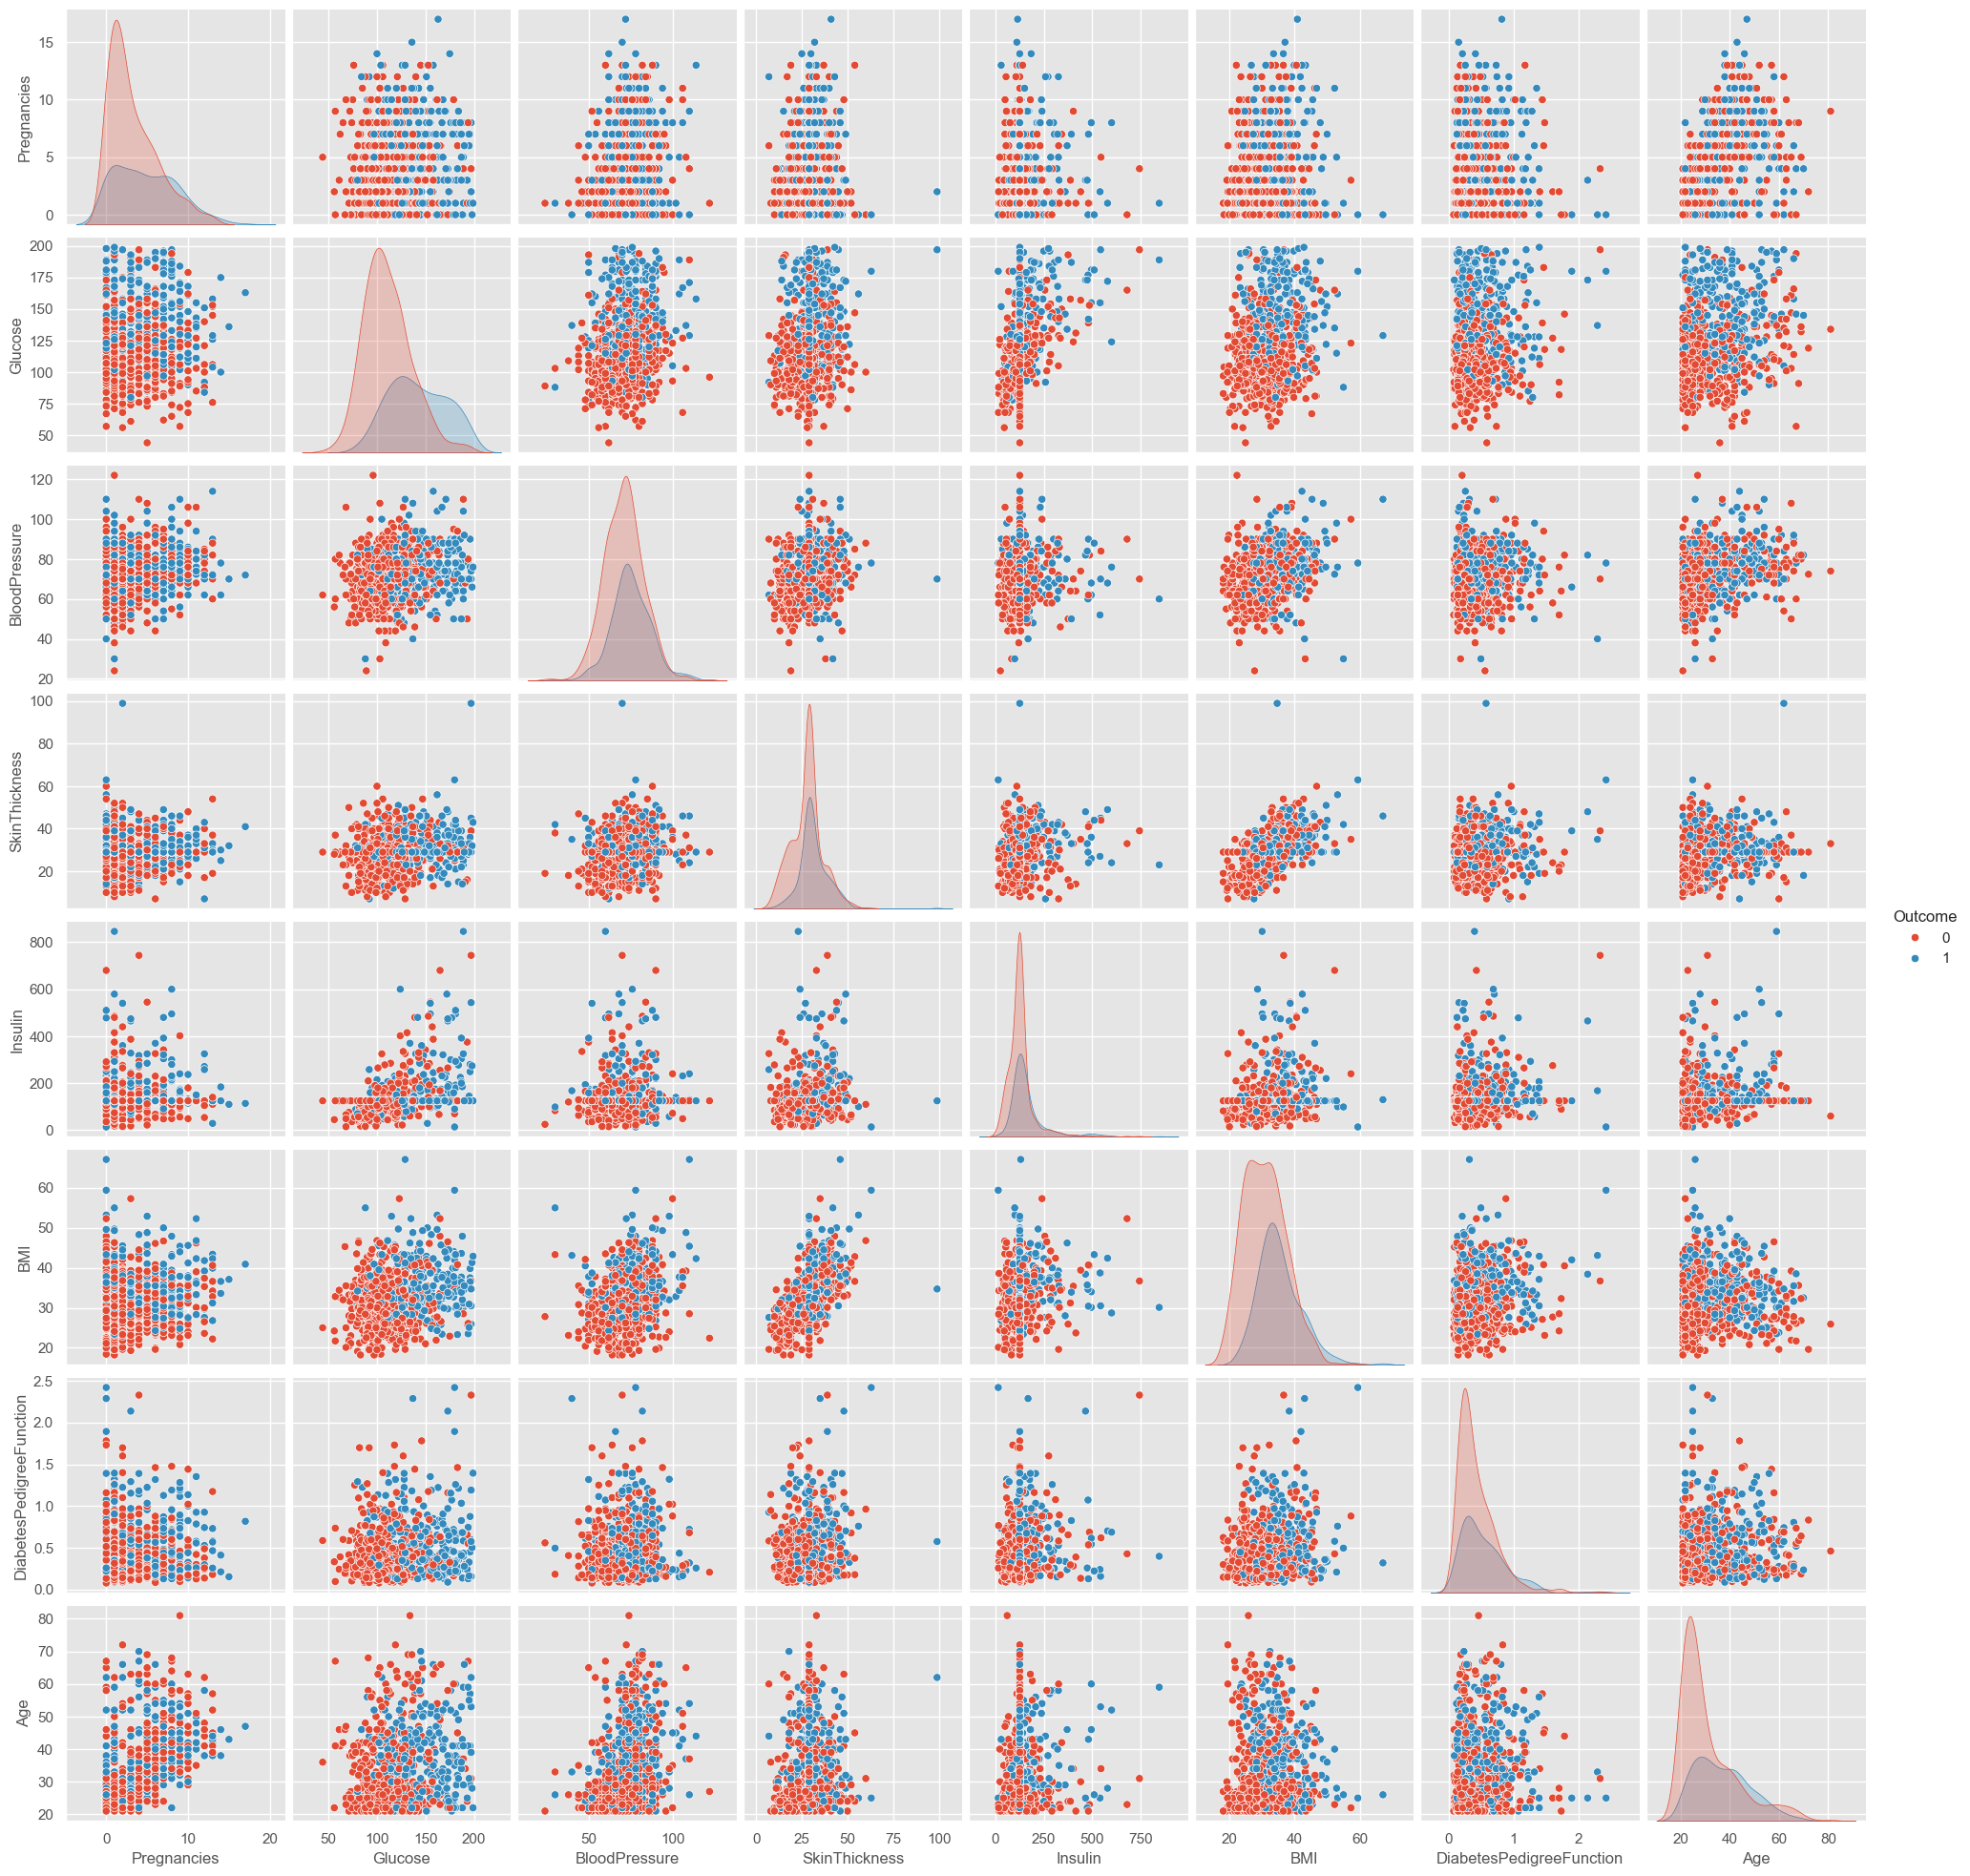

In [28]:
p=sns.pairplot(diabetes_data_copy, hue = 'Outcome')

***Pearson's Correlation Coefficient***: helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

#### Heatmap for unclean data

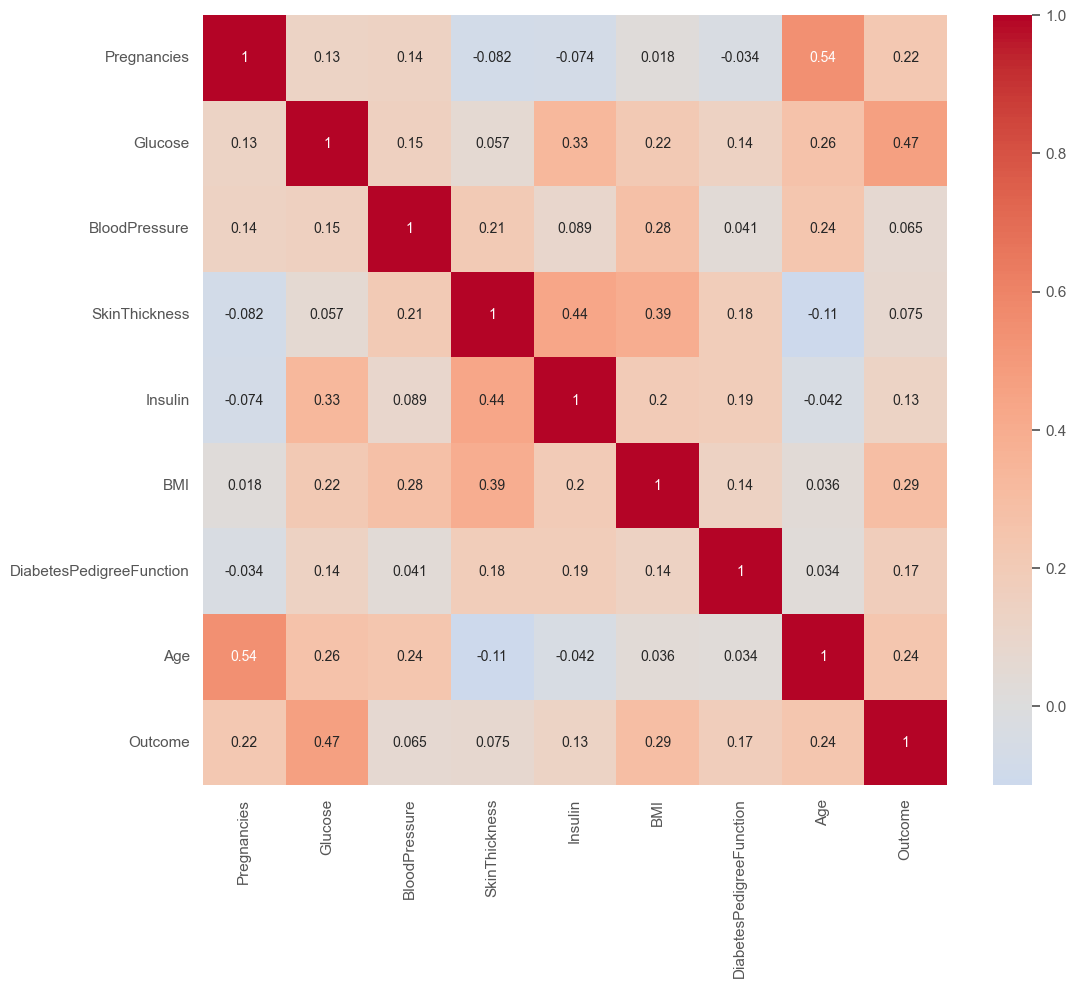

In [36]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data.corr(method='pearson'), annot=True,cmap ='coolwarm', center=0)  # seaborn has very simple solution for heatmap

#### Heatmap for clean data

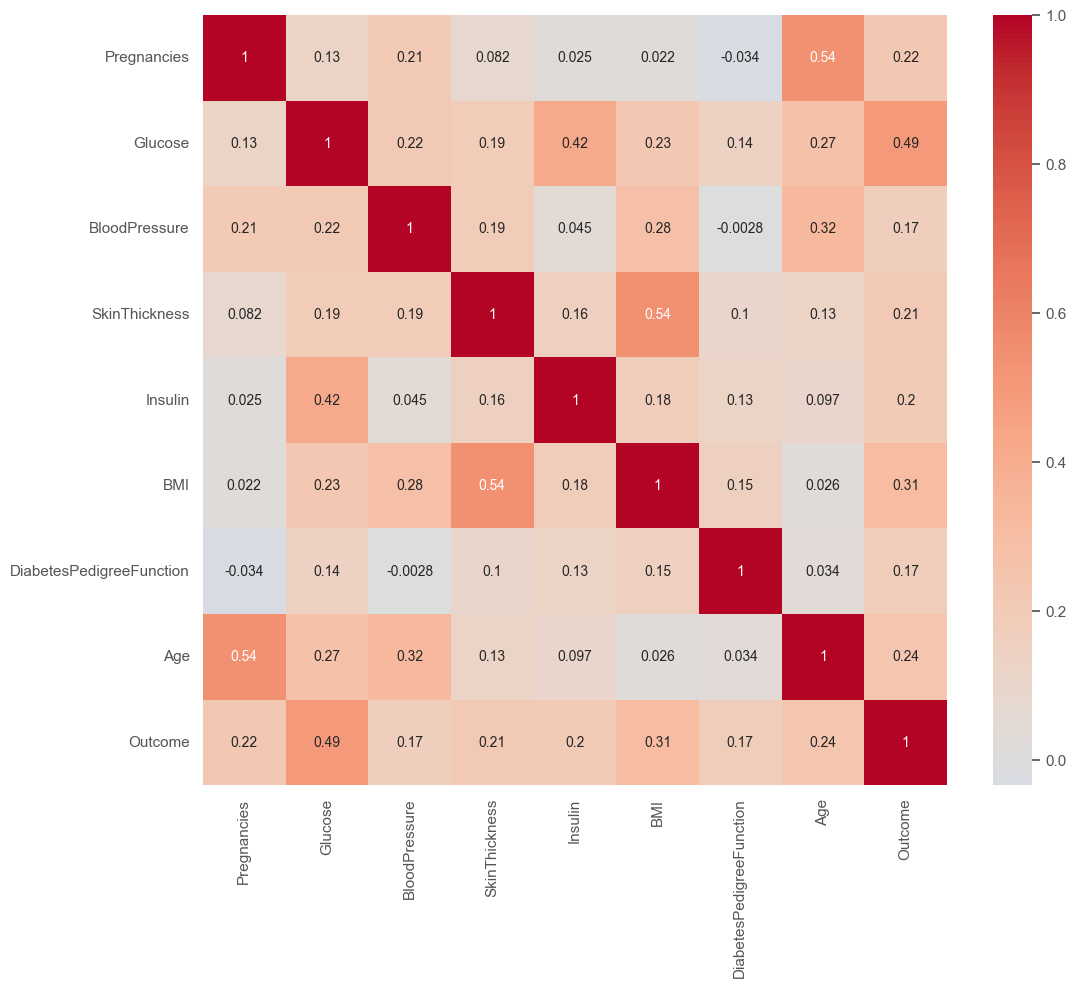

In [37]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data_copy.corr(), annot=True, cmap ='coolwarm', center=0)  # seaborn has very simple solution for heatmap

## Scaling the data 
data Z is rescaled such that μ = 0 and 𝛔 = 1, and is done through this formula:
![](https://cdn-images-1.medium.com/max/800/0*PXGPVYIxyI_IEHP7.)


#### to learn more about scaling techniques
https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc
https://machinelearningmastery.com/rescaling-data-for-machine-learning-in-python-with-scikit-learn/

In [38]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(diabetes_data_copy.drop("Outcome", axis=1))

In [39]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [40]:
#X = diabetes_data.drop("Outcome",axis = 1)
y = diabetes_data_copy.Outcome

### Why Scaling the data for KNN?

#### it is always advisable to bring all the features to the same scale for applying distance based algorithms like KNN.
##### Let's see an example of distance calculation using two features whose magnitudes/ranges vary greatly.
Euclidean Distance = $\sqrt{(100000–80000)^2 + (30–25)^2)}$

#### We can imagine how the feature with greater range with overshadow or dimenish the smaller feature completely and this will impact the performance of all distance based model as it will give higher weightage to variables which have higher magnitude.

## Test Train Split and Cross Validation methods



***Train Test Split*** : To have unknown datapoints to test the data rather than testing with the same points with which the model was trained. This helps capture the model performance much better.

![](https://cdn-images-1.medium.com/max/1600/1*-8_kogvwmL1H6ooN1A1tsQ.png)

***Cross Validation***: When model is split into training and testing it can be possible that specific type of data point may go entirely into either training or testing portion. This would lead the model to perform poorly. Hence over-fitting and underfitting problems can be well avoided with cross validation techniques

![](https://cdn-images-1.medium.com/max/1600/1*4G__SV580CxFj78o9yUXuQ.png)


***About Stratify*** : Stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

For Reference : https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

In [42]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [43]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [44]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [45]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.5625 % and k = [11]


## Result Visualisation

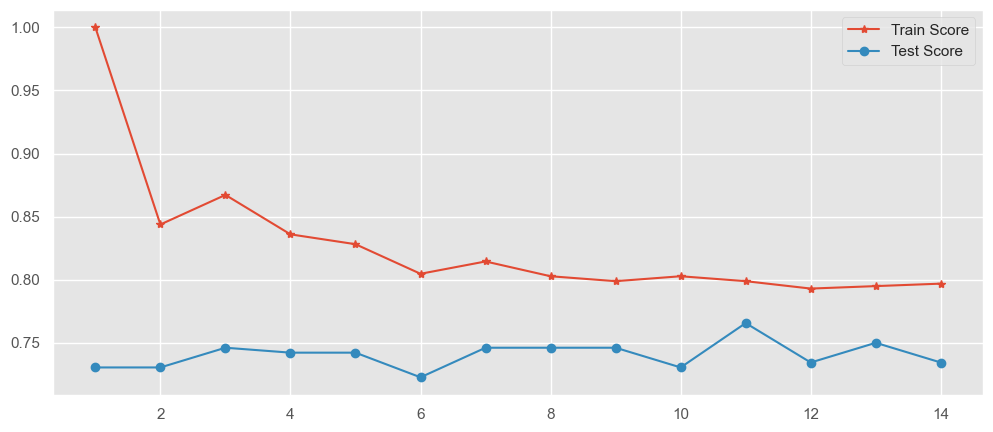

In [47]:
plt.figure(figsize=(12,5), dpi=100)
p = plt.plot(range(1,15),train_scores,marker='*',label='Train Score')
p = plt.plot(range(1,15),test_scores,marker='o',label='Test Score')
plt.legend()
plt.show()

#### The best result is captured at k = 11 hence 11 is used for the final model

In [48]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.765625

In [49]:
from sklearn.metrics import classification_report, f1_score

In [50]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       167
           1       0.68      0.61      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256



In [51]:
f1_score(y_test, y_pred).round(3)

0.643

# Model Performance Analysis

## 1. Confusion Matrix

The confusion matrix is a technique used for summarizing the performance of a classification algorithm i.e. it has binary outputs.
![](https://cdn-images-1.medium.com/max/1600/0*-GAP6jhtJvt7Bqiv.png)



### ***In the famous cancer example***:


###### Cases in which the doctor predicted YES (they have the disease), and they do have the disease will be termed as TRUE POSITIVES (TP). The doctor has correctly predicted that the patient has the disease.

###### Cases in which the doctor predicted NO (they do not have the disease), and they don’t have the disease will be termed as TRUE NEGATIVES (TN). The doctor has correctly predicted that the patient does not have the disease.

###### Cases in which the doctor predicted YES, and they do not have the disease will be termed as FALSE POSITIVES (FP). Also known as “Type I error”.

###### Cases in which the doctor predicted NO, and they have the disease will be termed as FALSE NEGATIVES (FN). Also known as “Type II error”.

In [52]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,142,25,167
1,35,54,89
All,177,79,256


Text(0.5, 20.049999999999997, 'Predicted label')

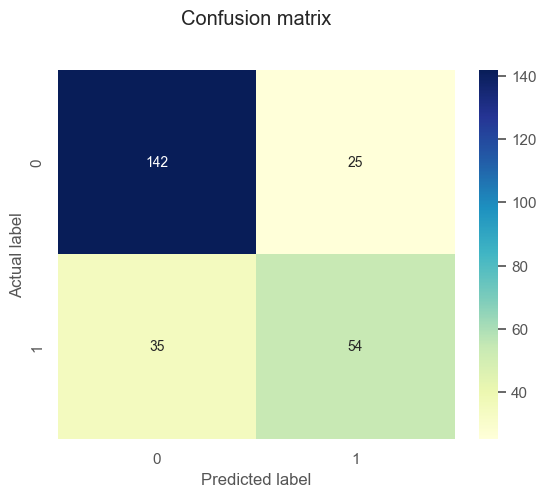

In [53]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## 2. Classification Report

Report which includes Precision, Recall and F1-Score.


#### Precision Score
        TP – True Positives
        FP – False Positives

        Precision – Accuracy of positive predictions.
        Precision = TP/(TP + FP)
        
   
#### Recall Score
        FN – False Negatives

        Recall(sensitivity or true positive rate): Fraction of positives that were correctly identified.
        Recall = TP/(TP+FN)
        
#### F1 Score
        F1 Score (aka F-Score or F-Measure) – A helpful metric for comparing two classifiers.
        F1 Score takes into account precision and the recall. 
        It is created by finding the the harmonic mean of precision and recall.

        F1 = 2 x (precision x recall)/(precision + recall)
        
        
        
> > ***Precision*** - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good.
> > 
> > Precision = TP/TP+FP
> > 
> > ***Recall (Sensitivity)*** - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label? A recall greater than 0.5 is good.
> > 
> > Recall = TP/TP+FN
> > 
> > ***F1 score*** - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. 
> > 
> > F1 Score = 2*(Recall * Precision) / (Recall + Precision)
        
        
For Reference: http://joshlawman.com/metrics-classification-report-breakdown-precision-recall-f1/
                        : https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/

In [54]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       167
           1       0.68      0.61      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256



## 3. ROC - AUC
ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things (e.g If a patient has a disease or no). Better models can accurately distinguish between the two. Whereas, a poor model will have difficulties in distinguishing between the two


Well Explained in this video: https://www.youtube.com/watch?v=OAl6eAyP-yo



In [55]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

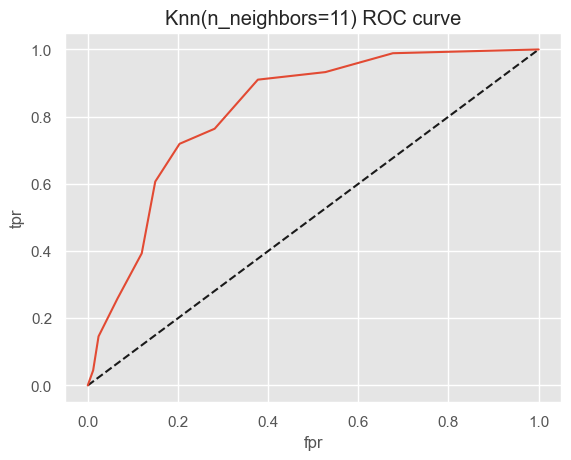

In [59]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [60]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8193500639171096

# Hyper Parameter optimization
Grid search is an approach to hyperparameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid. 

Let’s consider the following example: 

Suppose, a machine learning model X takes hyperparameters a1, a2 and a3. In grid searching, you first define the range of values for each of the hyperparameters a1, a2 and a3. You can think of this as an array of values for each of the hyperparameters. Now the grid search technique will construct many versions of X with all the possible combinations of hyperparameter (a1, a2 and a3) values that you defined in the first place. This range of hyperparameter values is referred to as the grid. 

Suppose, you defined the grid as:
a1 = [0,1,2,3,4,5]
a2 = [10,20,30,40,5,60]
a3 = [105,105,110,115,120,125]

Note that, the array of values of that you are defining for the hyperparameters has to be legitimate in a sense that you cannot supply Floating type values to the array if the hyperparameter only takes Integer values.

Now, grid search will begin its process of constructing several versions of X with the grid that you just defined.

It will start with the combination of [0,10,105], and it will end with [5,60,125]. It will go through all the intermediate combinations between these two which makes grid search computationally very expensive.

In [62]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {
    'n_neighbors':np.arange(1,50), 
    'weights' : ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan', 'cosine']
    
}
knn = KNeighborsClassifier()
# scorer = make_scorer(f1_score, greater_is_better=True)
knn_cv= GridSearchCV(knn,param_grid,cv=4, scoring='roc_auc', verbose=1)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Fitting 4 folds for each of 294 candidates, totalling 1176 fits
Best Score:0.8373731343283581
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 25, 'weights': 'distance'}


In [63]:
knn_cv.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=25, weights='distance')

GridSearchCV manually

In [64]:
from sklearn.model_selection import StratifiedKFold

In [65]:
X = diabetes_data_copy.drop('Outcome', axis=1)
y = diabetes_data_copy.Outcome

In [66]:
X.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31


In [67]:
kfold = StratifiedKFold(n_splits=4, random_state=42, shuffle=True)

for train_index, test_index in kfold.split(X, y):
    print(train_index[:5], test_index[:5])

[0 1 2 3 5] [ 4 14 23 29 31]
[1 2 3 4 9] [0 5 6 7 8]
[0 2 4 5 6] [ 1  3  9 13 22]
[0 1 3 4 5] [ 2 11 21 27 28]


In [68]:
kfold = StratifiedKFold(n_splits=4, random_state=42, shuffle=True)

f1_scores = []

for i, (train_index, test_index) in enumerate(kfold.split(X, y)):
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_test, y_test = X.iloc[test_index], y.iloc[test_index]
    # print(y_train.value_counts())

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred))
    
f1_scores

[0.6106870229007634,
 0.5873015873015873,
 0.6259541984732825,
 0.5076923076923077]

In [69]:
np.mean(f1_scores)

0.5829087790919852

In [72]:
kfold = StratifiedKFold(n_splits=4, random_state=42, shuffle=True)

f1_mean_scores = []

for N in np.arange(1, 50):
    f1_scores = []
    for i, (train_index, test_index) in enumerate(kfold.split(X, y)):
        X_train, y_train = X.iloc[train_index], y.iloc[train_index]
        X_test, y_test = X.iloc[test_index], y.iloc[test_index]
    
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        model = KNeighborsClassifier(n_neighbors=N)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        f1_scores.append(f1_score(y_test, y_pred))
        
    f1_mean_scores.append(np.mean(f1_scores))

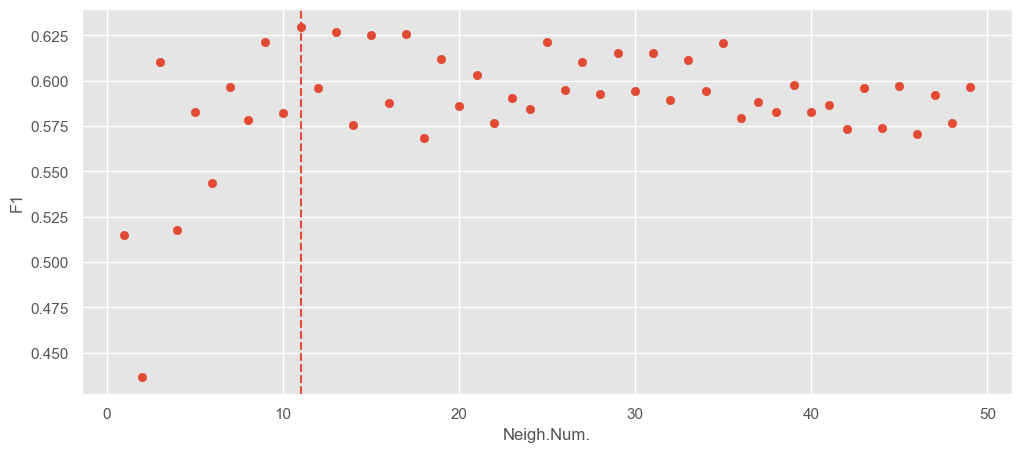

In [73]:
plt.figure(figsize=(12,5), dpi=100)
# plt.scatter(np.argmax(f1_mean_scores)+1, np.max(f1_mean_scores), s=100)
plt.axvline(11, linestyle='--')
plt.scatter(np.arange(1, 50), f1_mean_scores)
plt.xlabel('Neigh.Num.')
plt.ylabel('F1')
plt.show()